In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(56)

Phase 1: Generate the Data (The "World")

In [2]:
def f(x):
    return np.sin(2*np.pi*x)

x_train = np.random.uniform(0,1,10)
t_train = f(x_train) + np.random.normal(0,0.2,10)

x_test = np.linspace(0,1,100)
t_test = f(x_test)

Phase 2: The MLE Approach (The "Overfit")

In [3]:
def design_matrix(x, M):
    powers = np.arange(M+1)
    matrix = np.array([x**power for power in powers]).T
    return matrix


Phase 3: The Bayesian Approach (The "Solution")

In [4]:
M = 5

Phi_train = design_matrix(x_train, M)
Phi_test = design_matrix(x_test, M)

# minima of (1.62) wrt w
w_ML = np.linalg.inv(Phi_train.T @ Phi_train) @ Phi_train.T @ t_train

# This is the mean of (1.64)
y_pred_mle = Phi_test @ w_ML

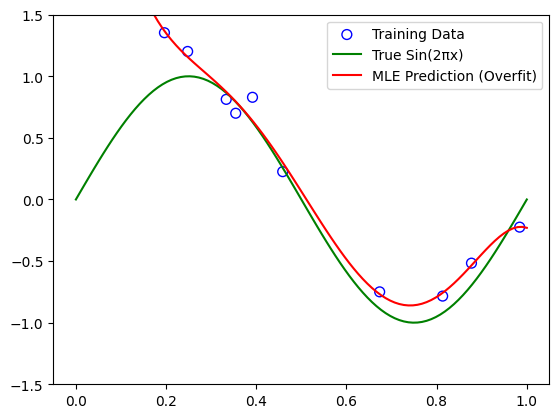

In [5]:
plt.scatter(x_train, t_train, facecolor="none", edgecolor="b", s=50, label="Training Data")
plt.plot(x_test, t_test, c="g", label="True Sin(2πx)")
plt.plot(x_test, y_pred_mle, c="r", label="MLE Prediction (Overfit)")
plt.ylim(-1.5, 1.5) # Zoom in so wild oscillations don't ruin the scale
plt.legend()
plt.show()

Phase 4: The Bayesian Implementation

In [6]:
# This relates to (#1.67)

alpha = 2e-3  # Prior precision (keeps weights small)
beta = 25.0   # Noise precision (we assumed sigma=0.2, so beta = 1/0.2^2 = 25)

I = np.eye(M+1)
S = np.linalg.inv(alpha*I + beta * Phi_train.T @ Phi_train)

# minima of (1.67)
w_MAP = beta * (S @ Phi_train.T @ t_train)

# m(x) in Bishop (1.70)
y_pred_bayes = Phi_test @ w_MAP

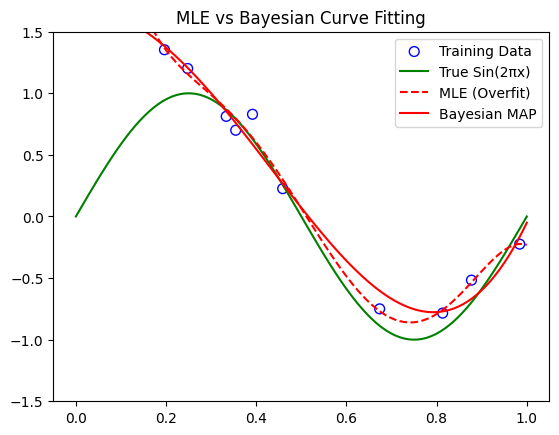

In [7]:
plt.scatter(x_train, t_train, facecolor="none", edgecolor="b", s=50, label="Training Data")
plt.plot(x_test, t_test, c="g", label="True Sin(2πx)")
plt.plot(x_test, y_pred_mle, c="r", linestyle="--", label="MLE (Overfit)")
plt.plot(x_test, y_pred_bayes, c="r", label="Bayesian MAP")

plt.ylim(-1.5, 1.5)
plt.legend()
plt.title("MLE vs Bayesian Curve Fitting")
plt.show()

Phase 4.5: The Predictive Variance (The "Pink Zone")

In [ ]:
variances = []

for phi_x in Phi_test:
    var = 1/beta + phi_x @ S @ phi_x.T
    variances.append(var)

# BETTER WAY TO DO THIS from GEMINI
# Vectorized version (Optional optimization)
# 1. Calculate Phi * S * Phi_transpose for all points at once
# 2. We only need the diagonal elements (variance of point i with itself)
# 3. We use (A @ B * A).sum(axis=1) efficiently
#model_uncertainty = np.sum(Phi_test @ S * Phi_test, axis=1) 
#variances = 1/beta + model_uncertainty

# s^2(x) in Bishop (1.71)
sigmas = np.sqrt(np.array(variances))


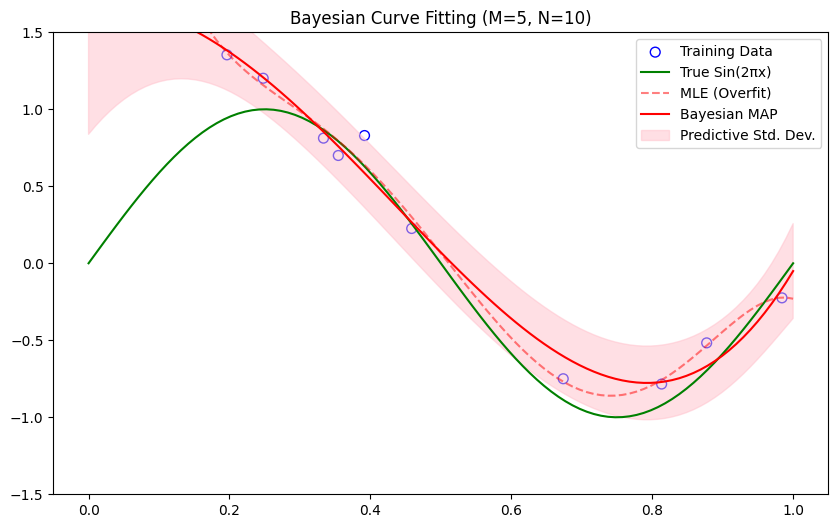

In [11]:
plt.figure(figsize=(10, 6))

plt.scatter(x_train, t_train, facecolor="none", edgecolor="b", s=50, label="Training Data")
plt.plot(x_test, t_test, c="g", label="True Sin(2πx)")
plt.plot(x_test, y_pred_mle, c="r", linestyle="--", alpha=0.5, label="MLE (Overfit)")
plt.plot(x_test, y_pred_bayes, c="r", label="Bayesian MAP")
plt.fill_between(x_test, 
                 y_pred_bayes - sigmas, 
                 y_pred_bayes + sigmas, 
                 color="pink", alpha=0.5, label="Predictive Std. Dev.")

plt.ylim(-1.5, 1.5)
plt.title(f"Bayesian Curve Fitting (M={M}, N={len(x_train)})")
plt.legend()
plt.show()